In [1]:
%%writefile data/sample_tweets.txt
11,Just finished my workout at the gym and feeling great 💪 #fitness #health,Los Angeles
12,Can't wait for the weekend to start! Any fun plans? #TGIF #weekendvibes,New York City
13,Excited to try out the new restaurant that just opened up in my neighborhood! #foodie #yum,San Francisco
14,Spent the afternoon volunteering at the local animal shelter. So many cute dogs and cats! 🐶🐱 #volunteer #animals,Miami
15,What a beautiful day to go for a hike in the mountains! 🌲🏞️ #nature #outdoors,Denver
16,Just had the best sushi of my life at this little hidden gem in the city! #foodie #sushi,Los Angeles
17,Feeling grateful for all the wonderful people in my life. Thank you for being there for me ❤️,Seattle
18,Just saw an incredible art exhibit at the museum. So inspiring! #art #culture,New York City
19,Can't wait to travel again and explore new places! ✈️🌎 #travel #adventure,San Francisco
20,Relaxing at home with a good book and a cup of tea. Perfect Sunday afternoon ☕️📖 #cozy #relax,Chicago
21,Just saw the most amazing Broadway show last night! The talent was incredible 🎭 #theater #musicals,New York City
22,Enjoying the beautiful view of the city skyline from my balcony. Grateful to call this place home ❤️ #citylife #views,Los Angeles
23,Excited to announce my new podcast! Check it out and let me know what you think 🎙️ #podcasting #newproject,Miami
24,Feeling inspired after attending a TED talk on leadership and innovation. So much to learn! #TEDtalks #inspiration,San Francisco
25,Can't wait for summer to arrive so I can spend more time at the beach! ☀️🏖️ #beachlife #summervibes,Miami
26,Just finished a long day of meetings at work. Time to unwind and relax! 🛀 #selfcare #rest,Chicago
27,Missing my family back home. Can't wait to see them soon ❤️ #family #homesick,Dallas
28,Feeling proud of myself for finishing my first 5K race! 🏃‍♀️ #running #fitness,Denver
29,Just tried the best ice cream ever at this little shop in the city! 🍦 #foodie #yum,New York City
30,Excited to attend my first music festival this weekend! 🎶 #music #festivals,Los Angeles
31,Can't believe how fast time flies. It feels like just yesterday I started my new job! #career #timeflies,Seattle
32,Enjoying the peace and quiet of a rainy day at home. Perfect time for some Netflix and chill 📺 #cozy #rainydays,Miami
33,Just got back from a weekend trip to the mountains. The scenery was breathtaking! 🌲🏞️ #travel #adventure,Denver
34,Feeling grateful for all the little things in life. It's the small moments that make the biggest impact ❤️,San Francisco
35,Just saw the most amazing fireworks show for the Fourth of July! 🎆 #fire, Miami

Writing data/sample_tweets.txt


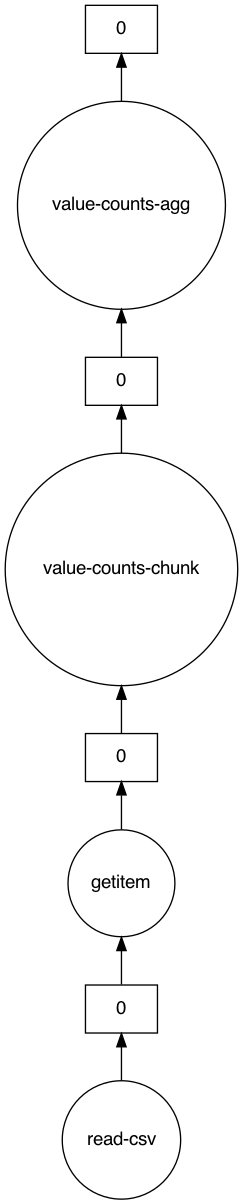

In [4]:
import dask.dataframe as dd

# Read the data into a Dask DataFrame
ddf = dd.read_csv('data/sample_tweets.txt', sep=',', header=None, names=['id', 'text', 'location'])

# Get the number of times each location appears in the dataset
task = ddf['location'].value_counts()

task.visualize()


In [5]:
task.compute()

Los Angeles      4
Miami            4
New York City    4
San Francisco    4
Denver           3
Chicago          2
Seattle          2
 Miami           1
Dallas           1
Name: location, dtype: int64

In [6]:
%%writefile data/sales_data.txt
2022-01-01,John Doe,ProductA,10.00,5
2022-01-02,Jane Smith,ProductB,20.00,3
2022-01-03,John Doe,ProductC,15.00,2
2022-01-04,Joe Bloggs,ProductA,10.00,10
2022-01-05,Jane Smith,ProductA,10.00,8
2022-01-06,John Doe,ProductB,20.00,4
2022-01-07,Joe Bloggs,ProductC,15.00,3
2022-01-08,Jane Smith,ProductC,15.00,5
2022-01-09,John Doe,ProductA,10.00,6
2022-01-10,Joe Bloggs,ProductB,20.00,2

Writing data/sales_data.txt


/Users/anthonyshaw/opt/anaconda3/envs/dask-tutorial/lib/python3.9/site-packages/dask/dataframe/groupby.py:2101: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g._meta = g._meta[key]


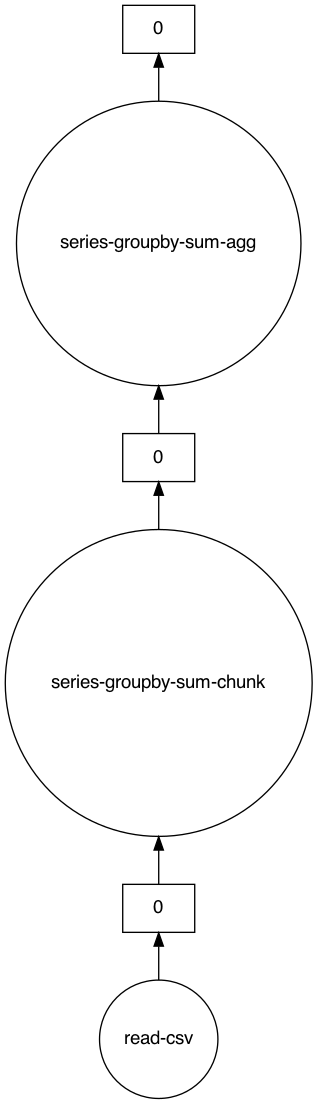

In [7]:
import dask.dataframe as dd

# Read the data into a Dask DataFrame
ddf = dd.read_csv('data/sales_data.txt', sep=',', header=None, names=['date', 'seller', 'product', 'price', 'quantity'])

# Get the total sales for each seller
task = ddf.groupby('seller')['price', 'quantity'].sum()

task.visualize()

/Users/anthonyshaw/opt/anaconda3/envs/dask-tutorial/lib/python3.9/site-packages/dask/dataframe/groupby.py:2101: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g._meta = g._meta[key]


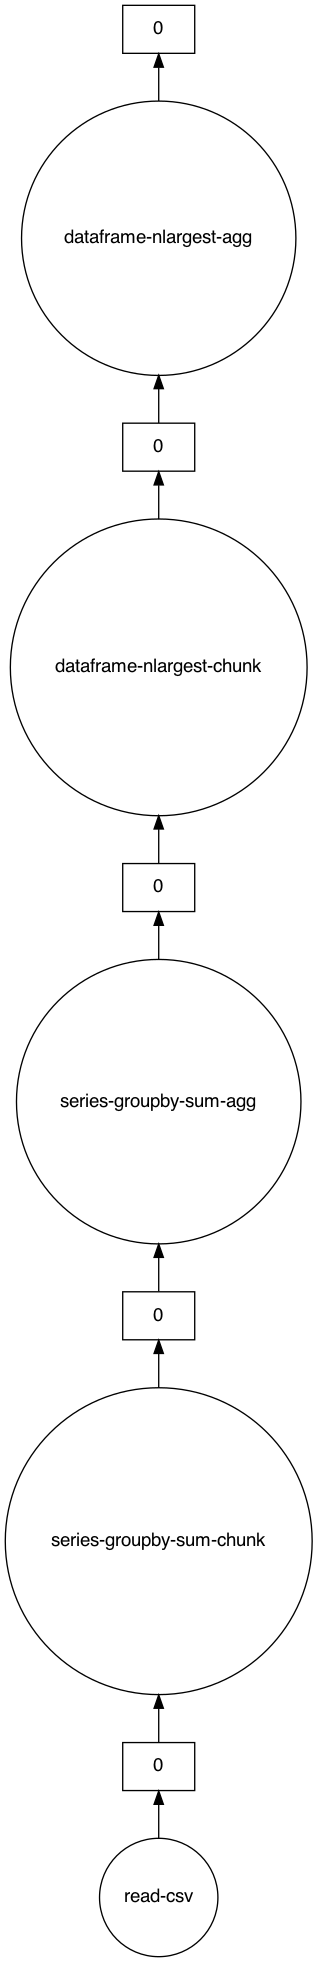

In [8]:
# Get the top sales people by total sales
task = ddf.groupby('seller')['price', 'quantity'].sum().nlargest(2, 'price')

task.visualize()

In [9]:
task.compute()

,price,quantity
seller,,
John Doe,55.0,17
Jane Smith,45.0,16


In [11]:
# Calculate the value of each sale
ddf['value'] = ddf['price'] * ddf['quantity']
# For each product get the sum of the sales values
task = ddf.groupby('product')['value'].sum()
task.compute()

product
ProductA    290.0
ProductB    180.0
ProductC    150.0
Name: value, dtype: float64